# Assignment 1 2024

In this assignment, you will be asked to implement popular CNN architectures to solve a popular image classification problem, Fashion MNIST. Your codes must be written in Tensorflow and be executable under Google colab. You will need a GPU access where Google colab gives you such access free of charge. Your report can be written in the same document as your codes in .ipynb file. Every step carries a particular mark indicated in every instruction. Full mark is 140 points.

### 1. Import relevant libraries that you need [10 marks]

##### list all the libraries that you need here

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.applications import ResNet50, VGG16
from skimage.transform import resize

### 2. Download the fashion MNIST dataset [5 marks]

##### The fashion MNIST dataset is available in the tensorflow. You can download it directly.

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


### 3. Visualize the dataset that has been downloaded. Yo need to plot the dataset in a batch and present them as a batch [10 marks]

##### Present your plot as a grid of images.

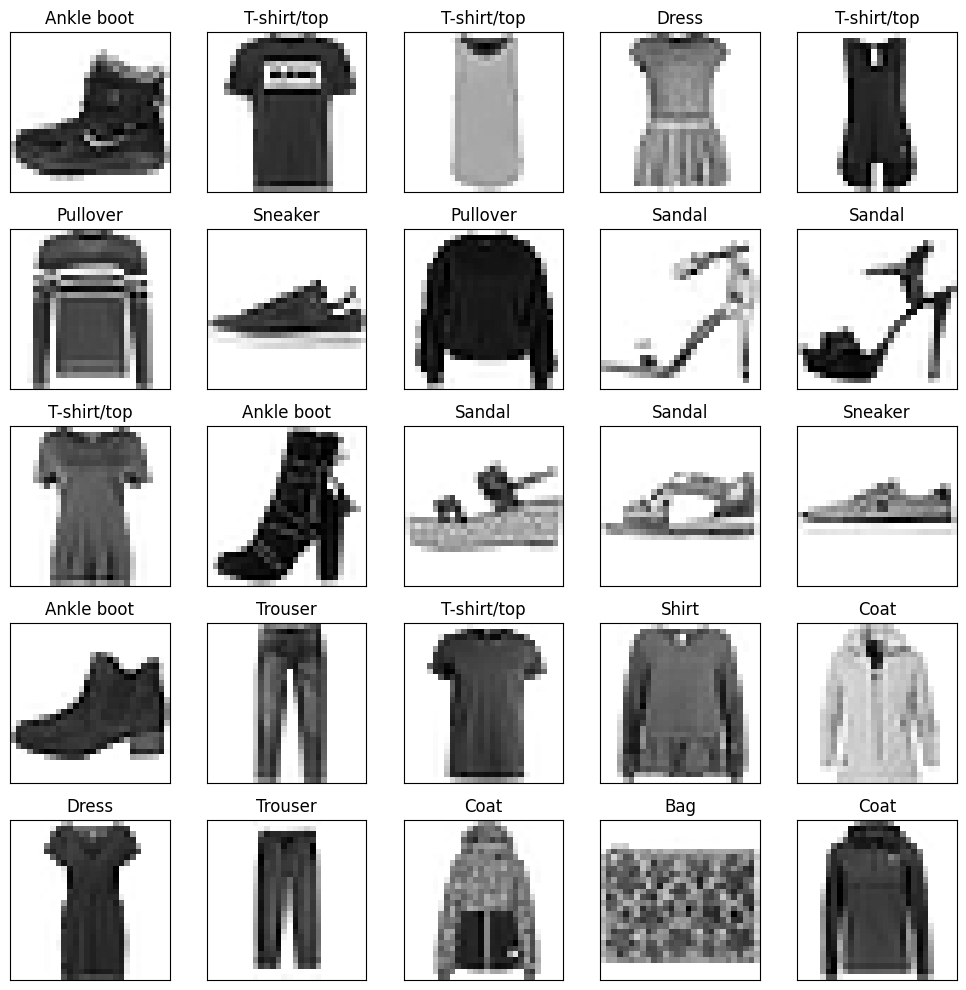

In [ ]:
def plot_batch(images, labels, class_names):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.title(class_names[labels[i]])
    plt.tight_layout()
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plot_batch(X_train[:25], y_train[:25], class_names)


### 4. Normalize the dataset into the range of $[0,1]$ [5 marks]


##### Normalization can be done by dividing with the maximum element.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

X_train.shape, X_train.min(), X_train.max()

((60000, 28, 28), 0.0, 1.0)

### 5. Create two hidden layer neural networks where each hidden layer comprises 128 nodes [10 marks]

##### The neural network can be built and customized from the keras library.

In [ ]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)


model = Sequential()

model.add(Dense(128, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

### 6. Create the training environments to train the neural network created in the previous cell. Use cross entropy loss function and ADAM optimizer [5 marks].

##### The training environment can be created from model.compile() instruction.

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 7. Train the network for 10 epochs with the batch size of 64 and validation split of 0.2. Training is performed under GPU [10 marks].

##### The network training process can be done using model.fit() instruction.

In [ ]:
history = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7619 - loss: 0.6831 - val_accuracy: 0.8408 - val_loss: 0.4486
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8374 - loss: 0.4639 - val_accuracy: 0.8276 - val_loss: 0.4792
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8441 - loss: 0.4460 - val_accuracy: 0.8317 - val_loss: 0.4743
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8496 - loss: 0.4331 - val_accuracy: 0.8491 - val_loss: 0.4339
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8481 - loss: 0.4315 - val_accuracy: 0.8471 - val_loss: 0.4476
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8551 - loss: 0.4210 - val_accuracy: 0.8490 - val_loss: 0.4337
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8537 - loss: 0.4192 - val_accuracy: 0.8507 - val_loss: 0.4348
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8547 - loss: 0.4115 - val_accuracy: 0.

### 8. Evaluate the model on the testing dataset and calculate the prediction accuracy [5 marks].

##### The evaluation can be done using model.evaluate() instruction.

In [ ]:
model.evaluate(X_test, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8409 - loss: 0.4675


[0.4799143970012665, 0.8363000154495239]

### 9. Rescale the dataset to the size of $32×32$ [10 marks].




##### One way to rescale the image is through skimage.

In [ ]:
X_train_resized = np.array([resize(image, (32, 32)) for image in X_train])
X_test_resized = np.array([resize(image, (32, 32)) for image in X_test])

### 10. Create ResNet50 Structure (https://arxiv.org/abs/1512.03385) [10 marks].




##### The resNet structure is readily available in the tensorflow library.

In [ ]:
model_resnet = ResNet50(
    include_top=True,
    input_shape=(32, 32, 1),
    weights=None,
    classes=10
)
model_resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_7             │ (None, 32, 32, 1)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 1)      │              0 │ input_layer_7[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          3,200 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,601,930 (90.03 MB)

 Trainable params: 23,548,810 (89.83 MB)

 Non-trainable params: 53,120 (207.50 KB)

### 11. Create the training environment to train the ResNet50 based on the ResNet structure in the previous step. Use the cross entropy loss function and the ADAM optimizer [5 marks].

##### As with question 6, the training environments can be set by model.compile() instruction.

In [ ]:
model_resnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### 12. Train the ResNet50 for 10 epochs with the batch size of 64 and validation split of 0.2. Training is performed under GPU [10 marks].

##### As with question 7, the training process can be executed by model.fit() instruction.

In [ ]:
history_resnet = model_resnet.fit(X_train_resized, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 95s 46ms/step - accuracy: 0.6178 - loss: 1.2569 - val_accuracy: 0.5981 - val_loss: 1.1964
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - accuracy: 0.6979 - loss: 0.9013 - val_accuracy: 0.7066 - val_loss: 0.8148
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.6965 - loss: 0.9718 - val_accuracy: 0.7437 - val_loss: 0.7217
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 28s 38ms/step - accuracy: 0.7357 - loss: 0.8491 - val_accuracy: 0.7557 - val_loss: 0.6830
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.6997 - loss: 0.9812 - val_accuracy: 0.6125 - val_loss: 15.1638
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7185 - loss: 0.8861 - val_accuracy: 0.7103 - val_loss: 0.9001
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7388 - loss: 0.8213 - val_accuracy: 0.4116 - val_loss: 2.3117
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 37ms/step - accuracy: 0.7584 - loss: 0.7254 -

### 13. Evaluate the model on the testing dataset and calculate the prediction accuracy [5 marks].



As with question 8, the evaluation can be done via model.evaluate() instruction.

In [ ]:
model_resnet.evaluate(X_test_resized, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7326 - loss: 0.7395


[0.7438371777534485, 0.7301999926567078]

### 14. Change your model to VGG16 (https://arxiv.org/abs/1409.1556v6) and repeat step 11 and 12 [20 marks].

##### VGG16 architecture is readily available from the tensorflow library.

In [ ]:
model_vgg16 = VGG16(
    include_top=True,
    input_shape=(32, 32, 1),
    weights=None,
    classes=10
)
model_vgg16.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 32, 32, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │       2,101,248 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,637,066 (128.32 MB)

 Trainable params: 33,637,066 (128.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_vgg16.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_resnet = model_vgg16.fit(X_train_resized, Y_train, batch_size=64, epochs=10, validation_split=0.2, verbose=1)

Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 57s 62ms/step - accuracy: 0.0971 - loss: 2.3069 - val_accuracy: 0.0983 - val_loss: 2.3026
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - accuracy: 0.1010 - loss: 2.3026 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.1016 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3028
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.1011 - loss: 2.3027 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.3027
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 42s 50ms/step - accuracy: 0.1007 - loss: 2.3026 - val_accuracy: 0.0957 - val_loss: 2.3027
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 48ms/step - accuracy: 0.0973 - loss: 2.3027 - val_accuracy: 0.0995 - val_loss: 2.3027
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 50ms/step - accuracy: 0.0973 - loss: 2.3026 - 

### 15. Evaluate the trained VGG16 model on the testing dataset [5 marks].



##### Evaluation can be done in the same way as above. You need to pay attention to the testing dataset to be used for evaluation.

In [ ]:
model_vgg16.evaluate(X_test_resized, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0993 - loss: 2.3027


[2.302600145339966, 0.10000000149011612]

### 16. Explain why the VGG16 does not perform as good as other two architectures [15 marks]. Your answer is written in this document.

In [ ]:
#### Write your answer here
'''
VGG16 suffers from the problem of too complex of a model for the simple task of identification of 32x32 / 28x28 greyscale fashion images. This can be supported by the summary of architecture used.
This can be supported by the fact that the 2 hidden layer with 128 neuron per layer had the best performance with an accuracy of around 90% This architecture has a lower chance of under and overfitting as the complexity of the architecture matches the complexity images used. The total parameters is around 118 thousand which is much lower than complex models. This can be further supported by examining the layers and architecture used in Resnet50 and VGG16.

Resnet50 has around 28 million parameters around 230 times more than the basic neural network. This makes it a far more complex model. The degredation in performance can be seen as it takes much longer to run Resnet50 and has an overall worse performance of around 70% accuracy.

VGG16 has around 33 million parameters according to the summary and only has an accuracy of around 10%. This is due to the complexity of the VGG16 model and the fact that the VGG16 model was not designed to perform on 32x32 grayscale photos. The model was originally designed for 224x224 RGB photos which makes it more unsuitable compared to the basic 2 hidden layer neural network and the Resnet50 model.
'''